# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* x : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 2 + 1.9 * x + e # Estimada e-> error
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)#Residuos mas desviación estandar

In [4]:
y_pred = 5 + 1.9 * x #Predicci+on

In [5]:
y_act = 5 + 1.9 * x + res #Actual

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,-3.614866,-1.514155,-1.868245
1,-1.647267,1.212685,1.870192
2,0.813862,6.190639,6.546338
3,2.838624,10.056037,10.393386
4,3.141070,10.563222,10.968032


In [9]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1 )] ##Promedio de Y

Text(0.5, 1.0, 'Valor actual vs Prediccion')

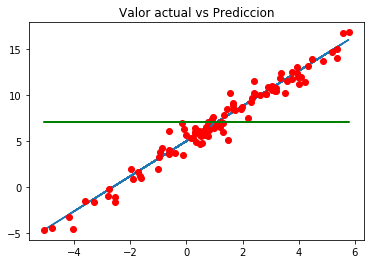

In [10]:
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs Prediccion")

In [11]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2##Suma de los cuadrados de la regresión **2 ->al cuadrado
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2##Suma de los cuadrados de la diferencia
data["SST"] = (data["y_actual"] - np.mean(y_act))**2##Suma de los cuadrados totales

In [12]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-3.614866,-1.514155,-1.868245,79.844228,0.125380,73.641622
1,-1.647267,1.212685,1.870192,27.010088,0.432315,34.276693
2,0.813862,6.190639,6.546338,0.271417,0.126522,0.768560
3,2.838624,10.056037,10.393386,11.062746,0.113804,8.932460
4,3.141070,10.563222,10.968032,15.215595,0.163872,12.221364


In [13]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [14]:
SSR

2077.831703398425

In [15]:
SSD

76.6158181419644

In [16]:
SST

2195.019794558147

In [17]:
SSR + SSD

2154.4475215403895

In [18]:
R2 = SSR/SST

In [19]:
R2

0.9466118294467081

(array([ 4.,  1.,  7., 18., 23., 29.,  6.,  9.,  2.,  1.]),
 array([-2.29416668, -1.79494618, -1.29572567, -0.79650517, -0.29728466,
         0.20193584,  0.70115634,  1.20037685,  1.69959735,  2.19881786,
         2.69803836]),
 <a list of 10 Patch objects>)

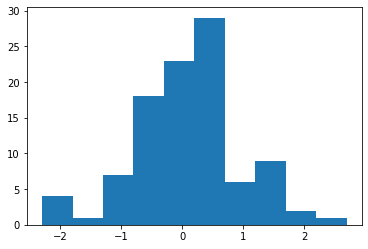

In [20]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión
* y = a + b * x
* b = sum((xi - x_m) * (y_i - y_m))/sum((xi - x_m)²)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.1457877736856517, 7.067315077003882)

In [23]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [24]:
beta= sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.867790545094882, 1.9196613739678834)

El modelo lineal obtenido por regresión es y = 4.867790545094882 + 1.9196613739678834 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-3.614866,-1.514155,-1.868245,79.844228,0.125380,73.641622,40.853403,22.663821,-2.071527
1,-1.647267,1.212685,1.870192,27.010088,0.432315,34.276693,16.352305,7.801157,1.705595
2,0.813862,6.190639,6.546338,0.271417,0.126522,0.768560,0.290991,0.110175,6.430131
3,2.838624,10.056037,10.393386,11.062746,0.113804,8.932460,5.059417,2.865695,10.316988
4,3.141070,10.563222,10.968032,15.215595,0.163872,12.221364,6.975319,3.981150,10.897581


In [31]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [32]:
SSR, SSD, SST

(2119.829355422623, 75.19043913552449, 2195.019794558147)

In [35]:
R2= SSR/SST

In [36]:
R2

0.9657449835660092

Text(0.5, 1.0, 'Valor actual vs Prediccion')

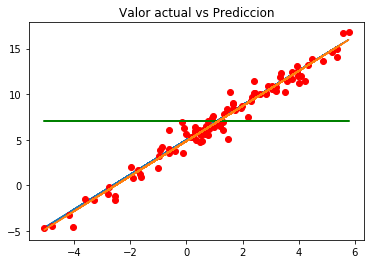

In [39]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1 )] ##Promedio de Y

plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs Prediccion")

## Error estándar de los residuos (RSE)

In [40]:
RSE = np.sqrt(SSD/(len(data)-2))

In [41]:
RSE

0.8759277247204379

In [42]:
np.mean(data["y_actual"])

7.067315077003882

In [43]:
RSE / np.mean(data["y_actual"])

0.12394066419517534